# Perf results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

pd.set_option('display.max_rows', 300)

### Method for parsing each file

In [2]:
def parse(fname):
    global header_printed
    d = {}
    with open(fname) as file:
        for line in file:
            if 'cache' in line or 'faults' in line:
                spline = [s.strip() for s in line.split(' ') if s]
                d[spline[1]] = spline[0]
    spf = fname.split('-')
    out = ''
    for i in range(1,len(spf)-1):
        out += f"{spf[i]},"
    # print(out)
    for k,v in d.items():
        out += f"{v},"
    if not header_printed:
        head = 'data,alg,esize,cores,csize,'
        for k in d.keys():
            head += f"{k},"
        out = f"{head[:-1]}\n{out}"
        header_printed = True
    return out[:-1]

### Actual parse by looping whole directory

In [3]:
%cd ../results/

/home/cassales/Documents/Parallel-Classifier-MOA/results


In [4]:
directory = os.fsencode("perfExp/")
print(os.getcwd())
header_printed = False

with open("perfExp/perf.csv", "w+") as output:
    
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.startswith("perf-"): 
            output.write(f"{parse(f'perfExp/{filename}')}\n")

/home/cassales/Documents/Parallel-Classifier-MOA/results


## Load csv built in previous and set rows to float

In [5]:
def load_df(filename):
    return pd.read_csv(filename)

pd.options.display.float_format = '{:,.2f}'.format
df = load_df('perfExp/perf.csv')
df.iloc[:,5:] = df.iloc[:,5:].astype('float64')

## Metrics used
__cache-misses__: counts both demand and speculative requests but only the cacheable ones

__cache-references__:  counts cacheable memory access missed in the L1 and the L2. If it hits in the L1, then it will *not* be counted by cache-references. Counts requests irrespective of whether they miss the L3

__dcache__: Data cache 

__icache__: Instruction cache

__LLC__: Last level cache

__L1__: L1 cache

__TLB__: Translation Lookaside Buffer. A cache used to reduce the time taken to access a user memory location. Part of chip's memory-management unit (MMU). Stores the recent translations of virtual memory to physical memory and can be called an address-translation cache.

In [13]:
for ds in df.data.unique():
    for alg in ['Ada', 'LBag', 'Stream', 'OzaBagAdwin', 'OzaBagExec', 'OzaBagASHT']:
        for esize in df.esize.unique():
            auxdf = df[(df.data == ds) & (df.esize == esize) & (df.alg.str.contains(alg))]
            display(auxdf.sort_values('csize').rename(columns={"csize": "minibatch-size"})[['data','alg','esize','cores','minibatch-size','cache-misses','cache-references']])

,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
80,covtypeNorm,AdaptiveRandomForestExecutorRUNPER,100,8,1,"12,659,286,411.00","61,869,000,624.00"
85,covtypeNorm,AdaptiveRandomForestExecutorMAXChunk,100,8,50,"13,265,235,053.00","23,122,291,291.00"
104,covtypeNorm,AdaptiveRandomForestExecutorMAXChunk,100,8,500,"12,260,145,830.00","20,717,006,478.00"
40,covtypeNorm,AdaptiveRandomForestExecutorMAXChunk,100,8,1000,"12,144,581,787.00","21,422,934,973.00"
87,covtypeNorm,AdaptiveRandomForestExecutorMAXChunk,100,8,1500,"12,345,572,525.00","22,232,977,602.00"
91,covtypeNorm,AdaptiveRandomForestExecutorMAXChunk,100,8,2000,"12,239,002,851.00","21,403,639,474.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
118,covtypeNorm,LBagExecutorRUNPER,100,8,1,"18,045,708,587.00","105,061,668,743.00"
59,covtypeNorm,LBagExecutorMAXChunk,100,8,50,"16,422,314,540.00","46,721,163,911.00"
53,covtypeNorm,LBagExecutorMAXChunk,100,8,500,"19,248,579,397.00","45,757,264,481.00"
42,covtypeNorm,LBagExecutorMAXChunk,100,8,1000,"20,206,471,306.00","47,050,417,110.00"
64,covtypeNorm,LBagExecutorMAXChunk,100,8,1500,"20,963,908,098.00","48,466,461,571.00"
31,covtypeNorm,LBagExecutorMAXChunk,100,8,2000,"21,105,451,681.00","48,252,888,823.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
57,covtypeNorm,StreamingRandomPatchesExecutorRUNPER,100,8,1,"65,157,443,669.00","172,089,157,864.00"
25,covtypeNorm,StreamingRandomPatchesExecutorMAXChunk,100,8,50,"61,763,423,560.00","97,867,639,640.00"
0,covtypeNorm,StreamingRandomPatchesExecutorMAXChunk,100,8,500,"60,210,525,154.00","95,699,237,061.00"
7,covtypeNorm,StreamingRandomPatchesExecutorMAXChunk,100,8,2000,"60,906,563,977.00","99,117,934,578.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
28,covtypeNorm,OzaBagAdwinExecutorRUNPER,100,8,1,"5,865,497,436.00","108,819,903,942.00"
120,covtypeNorm,OzaBagAdwinExecutorMAXChunk,100,8,50,"4,579,123,388.00","37,273,695,314.00"
126,covtypeNorm,OzaBagAdwinExecutorMAXChunk,100,8,500,"5,304,623,932.00","33,928,350,515.00"
49,covtypeNorm,OzaBagAdwinExecutorMAXChunk,100,8,1000,"5,959,412,621.00","34,273,159,797.00"
16,covtypeNorm,OzaBagAdwinExecutorMAXChunk,100,8,1500,"6,242,094,506.00","34,037,885,962.00"
83,covtypeNorm,OzaBagAdwinExecutorMAXChunk,100,8,2000,"6,679,852,710.00","34,619,562,071.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
46,covtypeNorm,OzaBagExecutorRUNPER,100,8,1,"11,260,980,680.00","93,488,888,736.00"
17,covtypeNorm,OzaBagExecutorMAXChunk,100,8,50,"9,411,093,586.00","36,206,749,993.00"
2,covtypeNorm,OzaBagExecutorMAXChunk,100,8,500,"8,318,771,508.00","33,621,995,912.00"
26,covtypeNorm,OzaBagExecutorMAXChunk,100,8,1000,"7,821,051,016.00","33,481,081,404.00"
41,covtypeNorm,OzaBagExecutorMAXChunk,100,8,1500,"7,411,208,036.00","32,874,219,897.00"
88,covtypeNorm,OzaBagExecutorMAXChunk,100,8,2000,"7,257,210,334.00","32,575,898,286.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
90,covtypeNorm,OzaBagASHTExecutorRUNPER,100,8,1,"5,927,469,954.00","101,370,882,672.00"
36,covtypeNorm,OzaBagASHTExecutorMAXChunk,100,8,50,"5,286,833,620.00","40,059,234,182.00"
71,covtypeNorm,OzaBagASHTExecutorMAXChunk,100,8,500,"4,648,498,412.00","36,992,656,192.00"
48,covtypeNorm,OzaBagASHTExecutorMAXChunk,100,8,2000,"4,302,451,418.00","39,074,552,161.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
96,elecNormNew,AdaptiveRandomForestExecutorRUNPER,100,8,1,"867,143,728.00","3,917,767,405.00"
99,elecNormNew,AdaptiveRandomForestExecutorMAXChunk,100,8,50,"793,066,196.00","2,301,305,767.00"
13,elecNormNew,AdaptiveRandomForestExecutorMAXChunk,100,8,500,"768,748,761.00","2,318,977,582.00"
84,elecNormNew,AdaptiveRandomForestExecutorMAXChunk,100,8,1000,"754,007,204.00","2,245,752,202.00"
102,elecNormNew,AdaptiveRandomForestExecutorMAXChunk,100,8,1500,"749,876,442.00","2,354,825,180.00"
69,elecNormNew,AdaptiveRandomForestExecutorMAXChunk,100,8,2000,"801,263,045.00","2,420,399,117.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
35,elecNormNew,LBagExecutorRUNPER,100,8,1,"496,066,790.00","2,747,820,761.00"
14,elecNormNew,LBagExecutorMAXChunk,100,8,50,"501,995,926.00","1,639,995,193.00"
30,elecNormNew,LBagExecutorMAXChunk,100,8,500,"486,234,323.00","1,571,587,944.00"
114,elecNormNew,LBagExecutorMAXChunk,100,8,1000,"459,952,433.00","1,479,526,845.00"
12,elecNormNew,LBagExecutorMAXChunk,100,8,1500,"453,550,200.00","1,586,987,044.00"
111,elecNormNew,LBagExecutorMAXChunk,100,8,2000,"443,535,382.00","1,383,696,525.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
98,elecNormNew,StreamingRandomPatchesExecutorRUNPER,100,8,1,"2,105,067,962.00","7,520,258,193.00"
62,elecNormNew,StreamingRandomPatchesExecutorMAXChunk,100,8,50,"1,999,965,833.00","3,892,481,500.00"
24,elecNormNew,StreamingRandomPatchesExecutorMAXChunk,100,8,500,"1,952,286,245.00","4,296,017,196.00"
22,elecNormNew,StreamingRandomPatchesExecutorMAXChunk,100,8,2000,"1,863,165,940.00","3,916,863,056.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
6,elecNormNew,OzaBagAdwinExecutorRUNPER,100,8,1,"234,837,647.00","1,945,325,981.00"
51,elecNormNew,OzaBagAdwinExecutorMAXChunk,100,8,50,"170,936,945.00","758,149,993.00"
93,elecNormNew,OzaBagAdwinExecutorMAXChunk,100,8,500,"168,768,710.00","813,696,319.00"
4,elecNormNew,OzaBagAdwinExecutorMAXChunk,100,8,1000,"175,794,170.00","913,703,993.00"
1,elecNormNew,OzaBagAdwinExecutorMAXChunk,100,8,1500,"156,270,658.00","768,146,177.00"
20,elecNormNew,OzaBagAdwinExecutorMAXChunk,100,8,2000,"156,180,867.00","919,097,750.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
37,elecNormNew,OzaBagExecutorRUNPER,100,8,1,"225,372,524.00","1,777,470,916.00"
27,elecNormNew,OzaBagExecutorMAXChunk,100,8,50,"205,422,555.00","785,843,789.00"
23,elecNormNew,OzaBagExecutorMAXChunk,100,8,500,"196,008,178.00","765,126,700.00"
43,elecNormNew,OzaBagExecutorMAXChunk,100,8,1000,"174,078,487.00","830,552,628.00"
34,elecNormNew,OzaBagExecutorMAXChunk,100,8,1500,"159,308,984.00","753,819,726.00"
73,elecNormNew,OzaBagExecutorMAXChunk,100,8,2000,"179,735,114.00","822,491,348.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
58,elecNormNew,OzaBagASHTExecutorRUNPER,100,8,1,"225,620,944.00","1,714,914,354.00"
119,elecNormNew,OzaBagASHTExecutorMAXChunk,100,8,50,"171,627,220.00","781,391,688.00"
9,elecNormNew,OzaBagASHTExecutorMAXChunk,100,8,500,"157,733,098.00","717,206,894.00"
115,elecNormNew,OzaBagASHTExecutorMAXChunk,100,8,2000,"155,628,568.00","761,057,982.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
116,GMSC,AdaptiveRandomForestExecutorRUNPER,100,8,1,"2,535,034,581.00","10,676,341,661.00"
122,GMSC,AdaptiveRandomForestExecutorMAXChunk,100,8,50,"2,495,157,727.00","4,724,759,177.00"
97,GMSC,AdaptiveRandomForestExecutorMAXChunk,100,8,500,"2,230,118,786.00","4,353,026,432.00"
44,GMSC,AdaptiveRandomForestExecutorMAXChunk,100,8,1000,"2,124,417,159.00","4,256,169,297.00"
92,GMSC,AdaptiveRandomForestExecutorMAXChunk,100,8,1500,"2,034,373,860.00","4,235,699,329.00"
18,GMSC,AdaptiveRandomForestExecutorMAXChunk,100,8,2000,"2,047,842,881.00","4,299,465,518.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
76,GMSC,LBagExecutorRUNPER,100,8,1,"2,595,043,754.00","8,367,579,461.00"
100,GMSC,LBagExecutorMAXChunk,100,8,50,"1,598,517,663.00","3,581,465,230.00"
56,GMSC,LBagExecutorMAXChunk,100,8,500,"1,595,753,237.00","3,534,285,416.00"
29,GMSC,LBagExecutorMAXChunk,100,8,1000,"1,577,167,226.00","3,557,401,036.00"
33,GMSC,LBagExecutorMAXChunk,100,8,1500,"1,574,360,304.00","3,683,168,077.00"
105,GMSC,LBagExecutorMAXChunk,100,8,2000,"1,524,549,262.00","3,735,802,905.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
3,GMSC,StreamingRandomPatchesExecutorRUNPER,100,8,1,"5,543,263,844.00","18,487,265,342.00"
75,GMSC,StreamingRandomPatchesExecutorMAXChunk,100,8,50,"5,285,165,902.00","8,682,085,688.00"
63,GMSC,StreamingRandomPatchesExecutorMAXChunk,100,8,500,"4,781,336,453.00","7,750,089,229.00"
124,GMSC,StreamingRandomPatchesExecutorMAXChunk,100,8,2000,"4,559,186,661.00","7,912,661,810.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
10,GMSC,OzaBagAdwinExecutorRUNPER,100,8,1,"714,763,090.00","5,468,084,747.00"
109,GMSC,OzaBagAdwinExecutorMAXChunk,100,8,50,"443,410,076.00","1,490,193,453.00"
123,GMSC,OzaBagAdwinExecutorMAXChunk,100,8,500,"427,576,175.00","1,366,105,470.00"
47,GMSC,OzaBagAdwinExecutorMAXChunk,100,8,1000,"389,912,984.00","1,396,224,384.00"
61,GMSC,OzaBagAdwinExecutorMAXChunk,100,8,1500,"379,669,383.00","1,409,460,727.00"
60,GMSC,OzaBagAdwinExecutorMAXChunk,100,8,2000,"362,996,563.00","1,411,779,250.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
54,GMSC,OzaBagExecutorRUNPER,100,8,1,"974,816,591.00","5,330,518,947.00"
8,GMSC,OzaBagExecutorMAXChunk,100,8,50,"617,070,645.00","1,724,781,903.00"
74,GMSC,OzaBagExecutorMAXChunk,100,8,500,"409,415,441.00","1,221,506,923.00"
95,GMSC,OzaBagExecutorMAXChunk,100,8,1000,"366,085,824.00","1,360,951,436.00"
121,GMSC,OzaBagExecutorMAXChunk,100,8,1500,"345,406,304.00","1,194,469,221.00"
125,GMSC,OzaBagExecutorMAXChunk,100,8,2000,"344,953,169.00","1,228,957,211.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
81,GMSC,OzaBagASHTExecutorRUNPER,100,8,1,"531,394,820.00","4,399,117,831.00"
103,GMSC,OzaBagASHTExecutorMAXChunk,100,8,50,"399,428,133.00","1,262,862,697.00"
77,GMSC,OzaBagASHTExecutorMAXChunk,100,8,500,"353,033,080.00","1,033,464,633.00"
78,GMSC,OzaBagASHTExecutorMAXChunk,100,8,2000,"334,957,561.00","1,090,147,236.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
11,airlines,AdaptiveRandomForestExecutorRUNPER,100,8,1,"40,377,619,889.00","85,796,601,387.00"
82,airlines,AdaptiveRandomForestExecutorMAXChunk,100,8,50,"41,622,464,544.00","63,762,030,836.00"
113,airlines,AdaptiveRandomForestExecutorMAXChunk,100,8,500,"42,349,866,720.00","62,596,604,613.00"
65,airlines,AdaptiveRandomForestExecutorMAXChunk,100,8,1000,"42,514,036,744.00","61,815,631,579.00"
50,airlines,AdaptiveRandomForestExecutorMAXChunk,100,8,1500,"42,501,995,116.00","62,240,640,929.00"
86,airlines,AdaptiveRandomForestExecutorMAXChunk,100,8,2000,"42,610,560,183.00","62,948,902,507.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
101,airlines,LBagExecutorRUNPER,100,8,1,"45,230,743,441.00","86,807,416,307.00"
38,airlines,LBagExecutorMAXChunk,100,8,50,"49,499,953,962.00","75,105,478,950.00"
89,airlines,LBagExecutorMAXChunk,100,8,500,"26,526,454,740.00","37,419,684,261.00"
127,airlines,LBagExecutorMAXChunk,100,8,1000,"21,748,035,743.00","29,969,762,976.00"
21,airlines,LBagExecutorMAXChunk,100,8,1500,"20,167,221,245.00","26,973,718,505.00"
79,airlines,LBagExecutorMAXChunk,100,8,2000,"19,511,244,520.00","26,309,407,894.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
15,airlines,StreamingRandomPatchesExecutorRUNPER,100,8,1,"45,135,751,224.00","110,900,916,448.00"
45,airlines,StreamingRandomPatchesExecutorMAXChunk,100,8,50,"46,647,026,459.00","68,340,574,257.00"
68,airlines,StreamingRandomPatchesExecutorMAXChunk,100,8,500,"45,973,594,040.00","67,255,846,865.00"
112,airlines,StreamingRandomPatchesExecutorMAXChunk,100,8,2000,"45,973,295,235.00","66,395,320,101.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
19,airlines,OzaBagAdwinExecutorRUNPER,100,8,1,"26,488,717,126.00","63,028,532,883.00"
5,airlines,OzaBagAdwinExecutorMAXChunk,100,8,50,"20,330,690,789.00","30,788,637,180.00"
39,airlines,OzaBagAdwinExecutorMAXChunk,100,8,500,"15,240,086,618.00","21,349,374,405.00"
72,airlines,OzaBagAdwinExecutorMAXChunk,100,8,1000,"13,060,204,823.00","18,316,951,280.00"
110,airlines,OzaBagAdwinExecutorMAXChunk,100,8,1500,"12,286,896,413.00","17,467,220,506.00"
66,airlines,OzaBagAdwinExecutorMAXChunk,100,8,2000,"11,553,908,103.00","16,329,513,488.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
117,airlines,OzaBagExecutorRUNPER,100,8,1,"9,267,662,671.00","24,245,167,922.00"
32,airlines,OzaBagExecutorMAXChunk,100,8,50,"9,918,235,786.00","13,687,964,872.00"
70,airlines,OzaBagExecutorMAXChunk,100,8,500,"9,449,449,851.00","12,377,028,141.00"
55,airlines,OzaBagExecutorMAXChunk,100,8,1000,"9,160,907,138.00","12,309,486,360.00"
106,airlines,OzaBagExecutorMAXChunk,100,8,1500,"9,064,554,247.00","12,141,687,795.00"
94,airlines,OzaBagExecutorMAXChunk,100,8,2000,"8,917,825,792.00","12,361,731,410.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
52,airlines,OzaBagASHTExecutorRUNPER,100,8,1,"4,779,216,612.00","39,986,553,008.00"
67,airlines,OzaBagASHTExecutorMAXChunk,100,8,50,"3,918,189,765.00","10,629,814,577.00"
107,airlines,OzaBagASHTExecutorMAXChunk,100,8,500,"3,810,425,656.00","9,953,613,833.00"
108,airlines,OzaBagASHTExecutorMAXChunk,100,8,2000,"3,579,788,744.00","9,603,125,726.00"


In [7]:
for ds in df.data.unique():
    for alg in ['Stream', 'OzaBagASHT']:
        for esize in df.esize.unique():
            auxdf = df[(df.data == ds) & (df.esize == esize) & (df.alg.str.contains(alg))]
            display(auxdf.sort_values('csize').rename(columns={"csize": "minibatch-size"})[['data','alg','esize','cores','minibatch-size','cache-misses','cache-references']])

,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
57,covtypeNorm,StreamingRandomPatchesExecutorRUNPER,100,8,1,"65,157,443,669.00","172,089,157,864.00"
25,covtypeNorm,StreamingRandomPatchesExecutorMAXChunk,100,8,50,"61,763,423,560.00","97,867,639,640.00"
0,covtypeNorm,StreamingRandomPatchesExecutorMAXChunk,100,8,500,"60,210,525,154.00","95,699,237,061.00"
7,covtypeNorm,StreamingRandomPatchesExecutorMAXChunk,100,8,2000,"60,906,563,977.00","99,117,934,578.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
90,covtypeNorm,OzaBagASHTExecutorRUNPER,100,8,1,"5,927,469,954.00","101,370,882,672.00"
36,covtypeNorm,OzaBagASHTExecutorMAXChunk,100,8,50,"5,286,833,620.00","40,059,234,182.00"
71,covtypeNorm,OzaBagASHTExecutorMAXChunk,100,8,500,"4,648,498,412.00","36,992,656,192.00"
48,covtypeNorm,OzaBagASHTExecutorMAXChunk,100,8,2000,"4,302,451,418.00","39,074,552,161.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
98,elecNormNew,StreamingRandomPatchesExecutorRUNPER,100,8,1,"2,105,067,962.00","7,520,258,193.00"
62,elecNormNew,StreamingRandomPatchesExecutorMAXChunk,100,8,50,"1,999,965,833.00","3,892,481,500.00"
24,elecNormNew,StreamingRandomPatchesExecutorMAXChunk,100,8,500,"1,952,286,245.00","4,296,017,196.00"
22,elecNormNew,StreamingRandomPatchesExecutorMAXChunk,100,8,2000,"1,863,165,940.00","3,916,863,056.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
58,elecNormNew,OzaBagASHTExecutorRUNPER,100,8,1,"225,620,944.00","1,714,914,354.00"
119,elecNormNew,OzaBagASHTExecutorMAXChunk,100,8,50,"171,627,220.00","781,391,688.00"
9,elecNormNew,OzaBagASHTExecutorMAXChunk,100,8,500,"157,733,098.00","717,206,894.00"
115,elecNormNew,OzaBagASHTExecutorMAXChunk,100,8,2000,"155,628,568.00","761,057,982.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
3,GMSC,StreamingRandomPatchesExecutorRUNPER,100,8,1,"5,543,263,844.00","18,487,265,342.00"
75,GMSC,StreamingRandomPatchesExecutorMAXChunk,100,8,50,"5,285,165,902.00","8,682,085,688.00"
63,GMSC,StreamingRandomPatchesExecutorMAXChunk,100,8,500,"4,781,336,453.00","7,750,089,229.00"
124,GMSC,StreamingRandomPatchesExecutorMAXChunk,100,8,2000,"4,559,186,661.00","7,912,661,810.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
81,GMSC,OzaBagASHTExecutorRUNPER,100,8,1,"531,394,820.00","4,399,117,831.00"
103,GMSC,OzaBagASHTExecutorMAXChunk,100,8,50,"399,428,133.00","1,262,862,697.00"
77,GMSC,OzaBagASHTExecutorMAXChunk,100,8,500,"353,033,080.00","1,033,464,633.00"
78,GMSC,OzaBagASHTExecutorMAXChunk,100,8,2000,"334,957,561.00","1,090,147,236.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
15,airlines,StreamingRandomPatchesExecutorRUNPER,100,8,1,"45,135,751,224.00","110,900,916,448.00"
45,airlines,StreamingRandomPatchesExecutorMAXChunk,100,8,50,"46,647,026,459.00","68,340,574,257.00"
68,airlines,StreamingRandomPatchesExecutorMAXChunk,100,8,500,"45,973,594,040.00","67,255,846,865.00"
112,airlines,StreamingRandomPatchesExecutorMAXChunk,100,8,2000,"45,973,295,235.00","66,395,320,101.00"


,data,alg,esize,cores,minibatch-size,cache-misses,cache-references
52,airlines,OzaBagASHTExecutorRUNPER,100,8,1,"4,779,216,612.00","39,986,553,008.00"
67,airlines,OzaBagASHTExecutorMAXChunk,100,8,50,"3,918,189,765.00","10,629,814,577.00"
107,airlines,OzaBagASHTExecutorMAXChunk,100,8,500,"3,810,425,656.00","9,953,613,833.00"
108,airlines,OzaBagASHTExecutorMAXChunk,100,8,2000,"3,579,788,744.00","9,603,125,726.00"


## Line graphs for some of the metrics
#### Huge drops on 1 to 50, mostly stable after

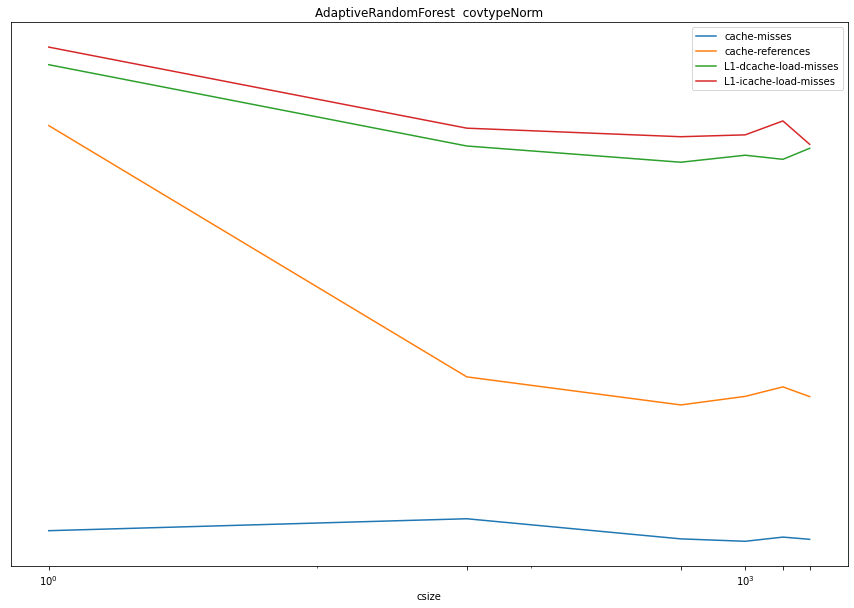

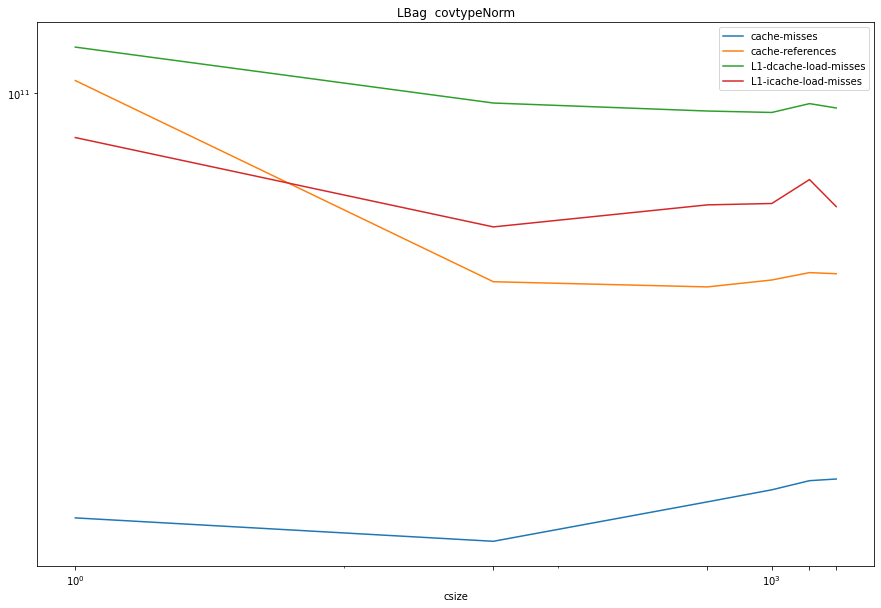

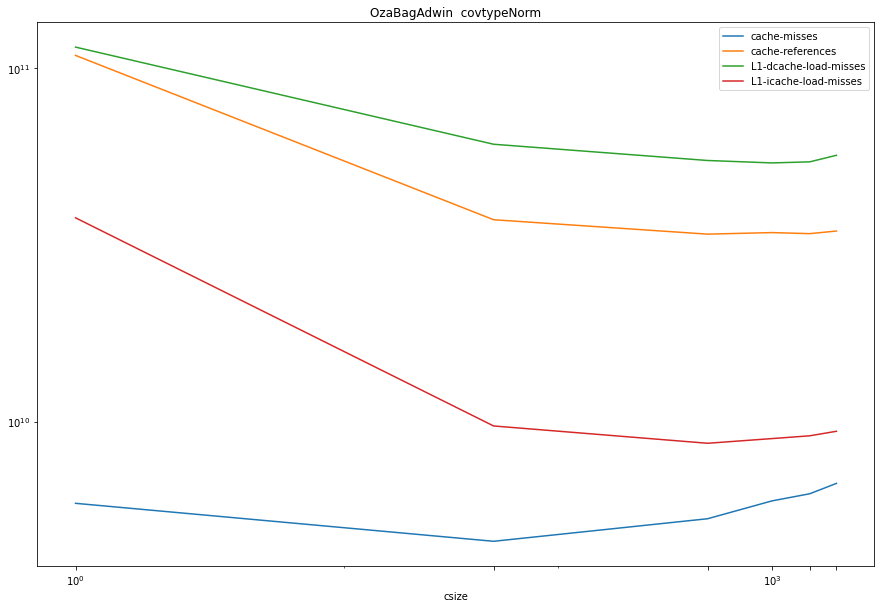

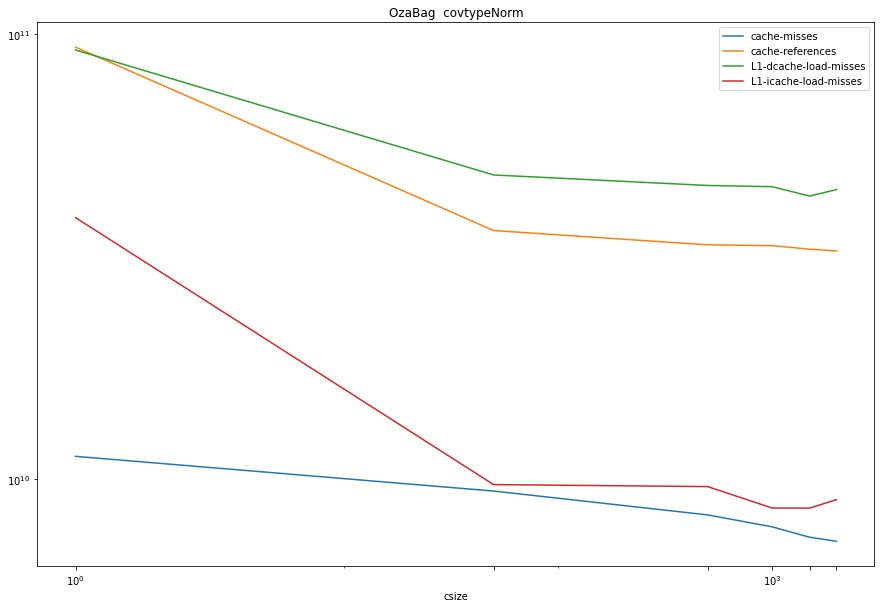

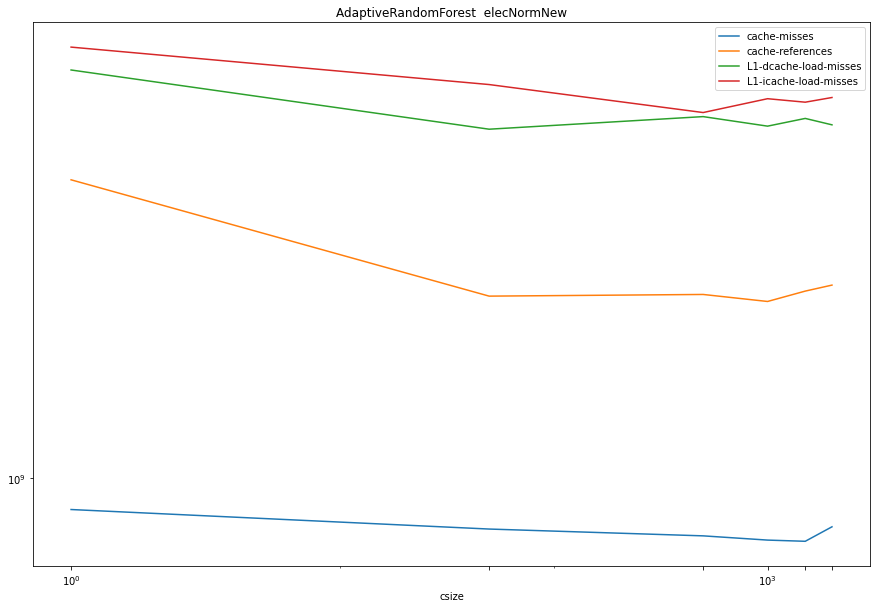

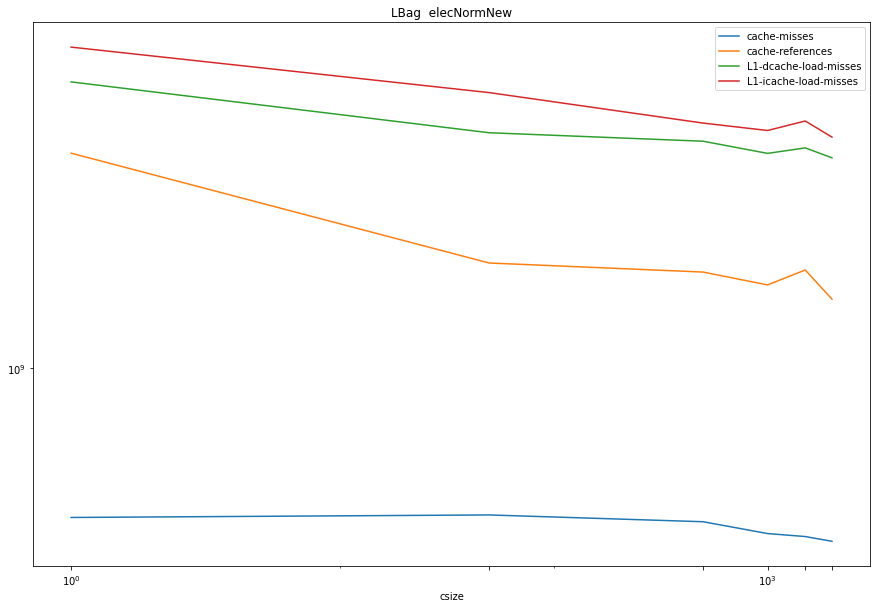

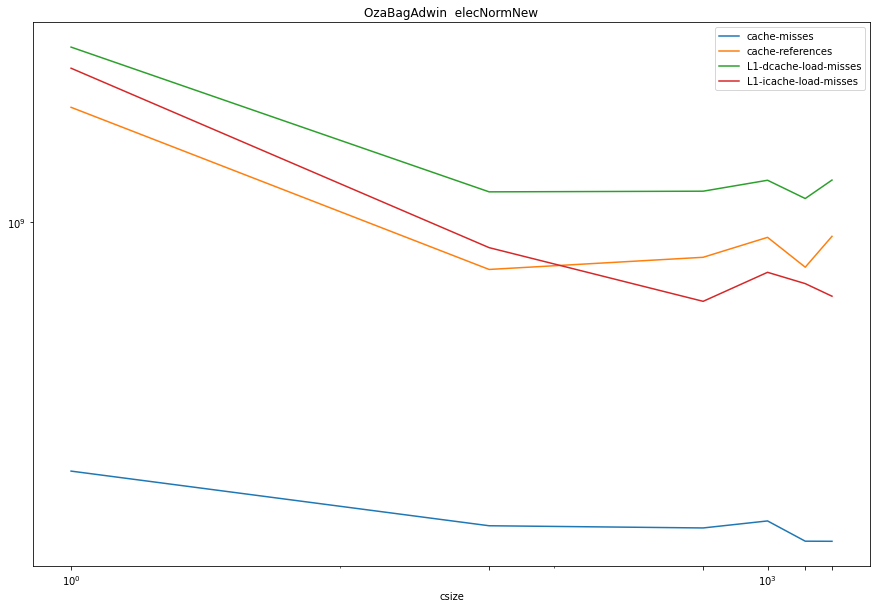

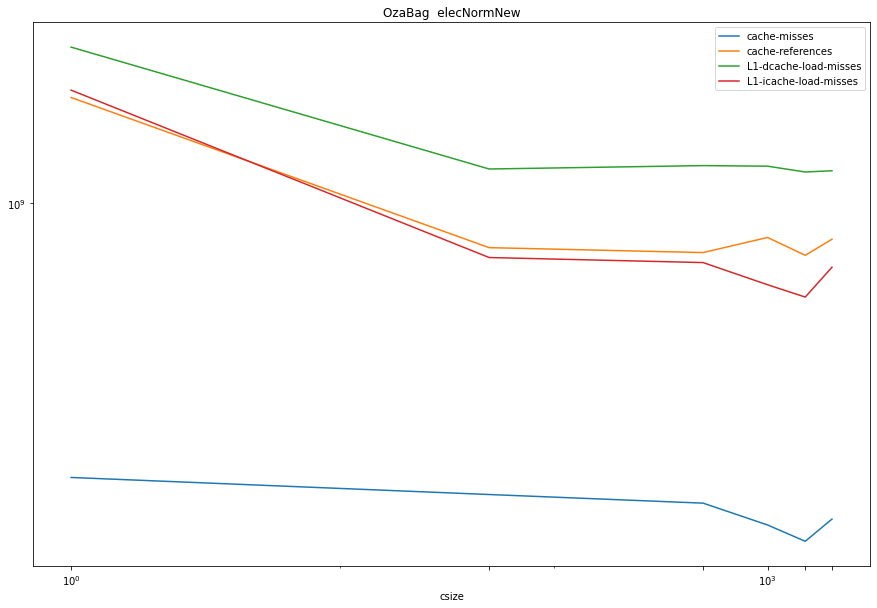

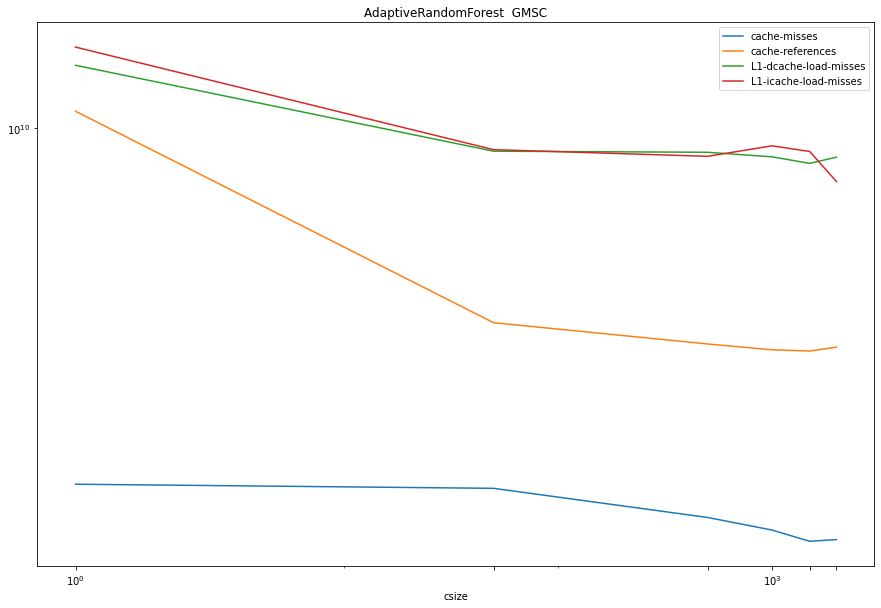

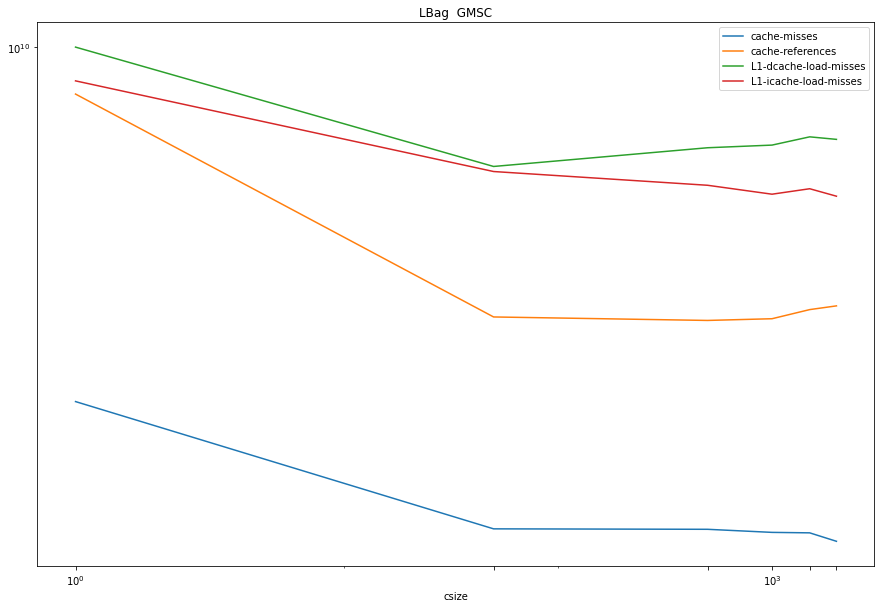

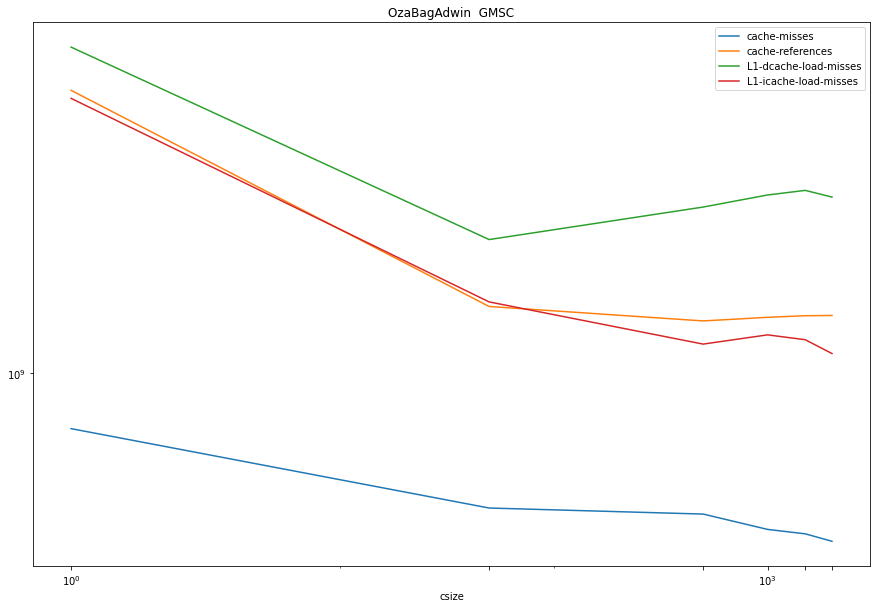

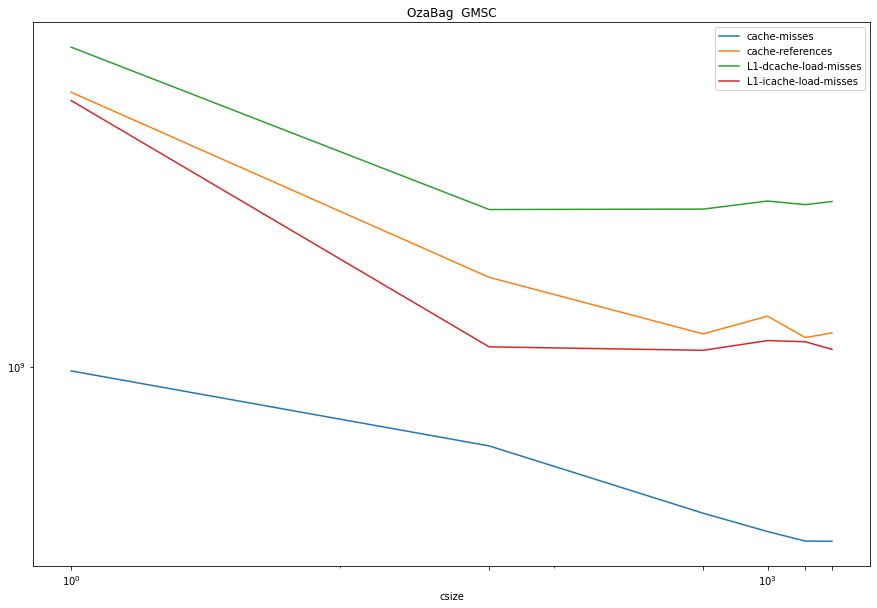

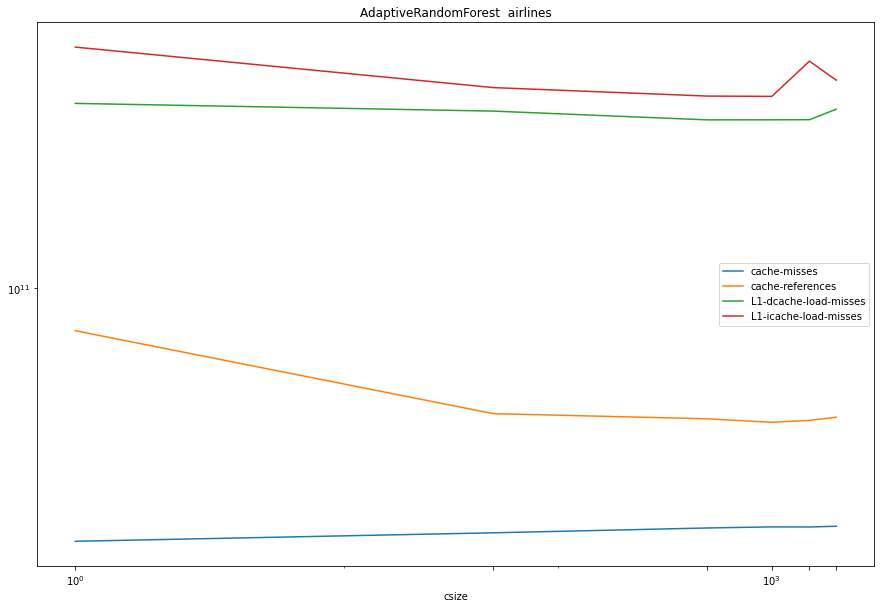

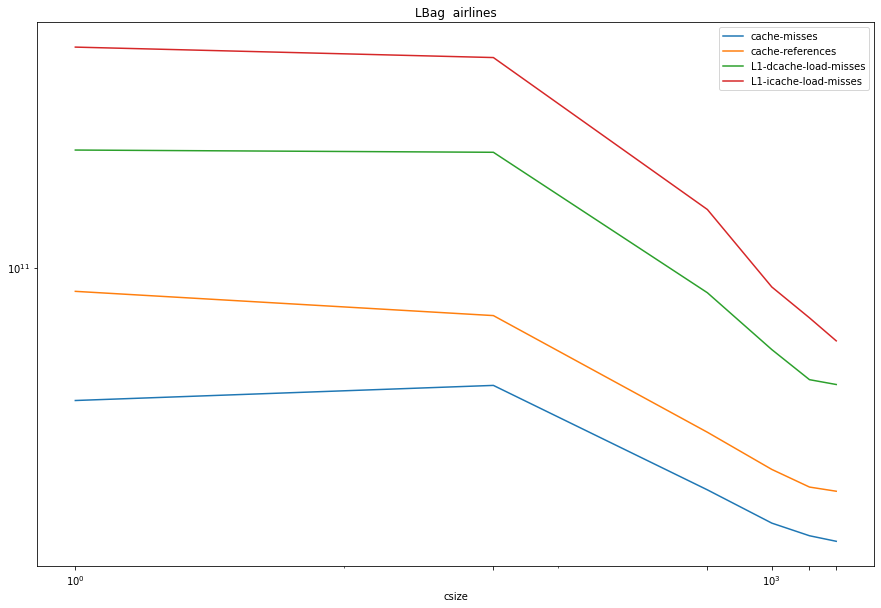

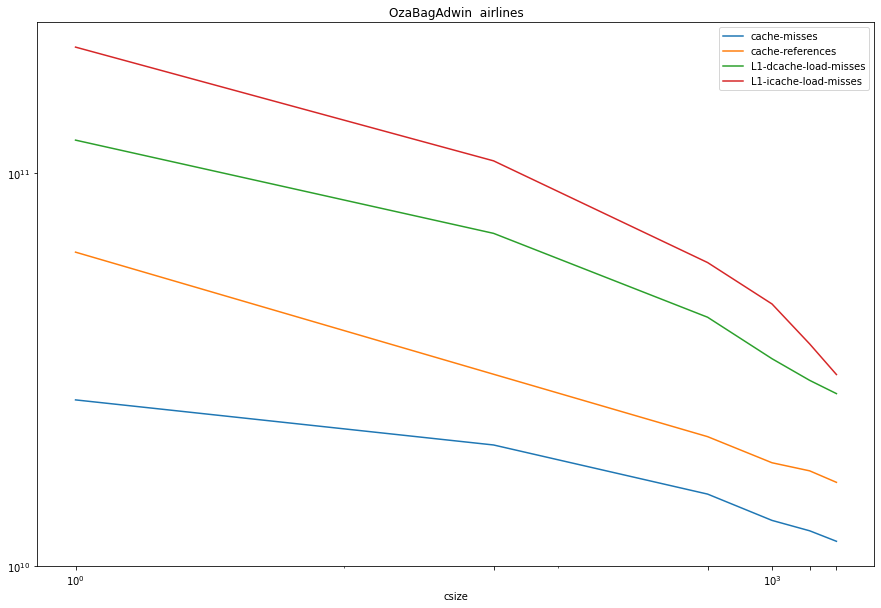

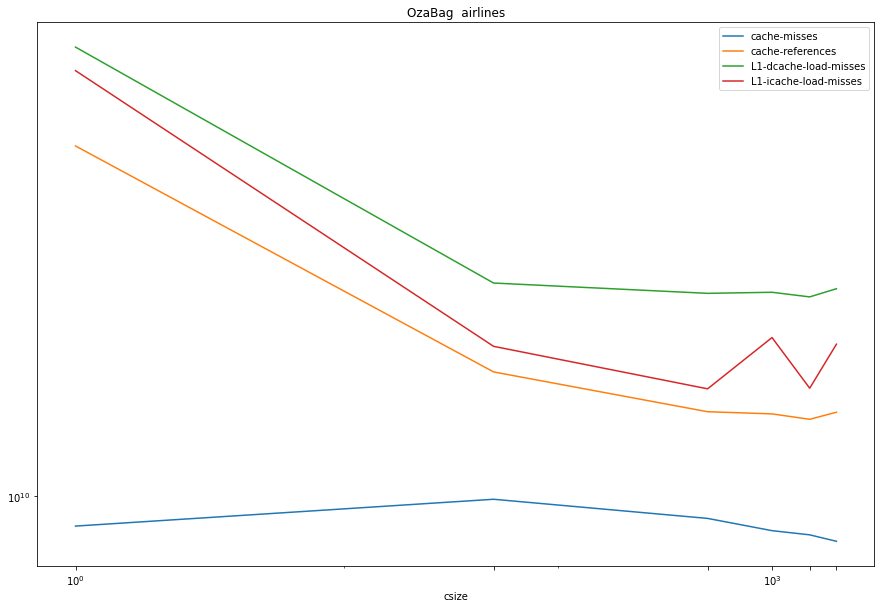

In [8]:
#graphs
for ds in df.data.unique():
    for alg in ['Ada', 'LBag','OzaBagAdwin', 'OzaBagExec']:
        for esize in df.esize.unique():
            auxdf = df[(df.data == ds) & (df.esize == esize) & (df.alg.str.contains(alg))].sort_values('csize')
            name = f"{auxdf.alg.iloc[0].split('E')[0]}  {auxdf.data.iloc[0]}"
#             fig, (ax1, ax2) = plt.subplots(1, 1, figsize=(15,5))
            fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
            graph1 = auxdf[['csize',
                           'cache-misses',
                           'cache-references',
                           'L1-dcache-load-misses',
                           'L1-icache-load-misses']]
#             graph2 = auxdf[['csize', 'dTLB-load-misses', 'iTLB-load-misses']]
            graph1.set_index('csize').plot(title=name,xticks=[1,50,500,1000,1500,2000],ax=ax1,logy="sym",logx="sym")            
#             graph2.set_index('csize').plot(title=name,xticks=[1,50,500,1000,1500,2000],ax=ax2)

In [9]:
def linear_graph():
    #graphs for all dataset, only references and L1{d/i}-load-misses
    markers=['.','s','P','d']
    algs = ['Ada', 'LBag','OzaBagAdwin', 'OzaBagExec']
    # fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,5))
    fig, axis = plt.subplots(2, 2, figsize=(12,8), tight_layout=True)
    position={'elecNormNew': [0,0], 'covtypeNorm': [0,1], 'GMSC': [1,0], 'airlines': [1,1]}
    for ds in df.data.unique():
        ax1 = axis[position[ds][0]][position[ds][1]]
        for alg in algs:
            auxdf = df[(df.data == ds) & (df.alg.str.contains(alg))].sort_values('csize')
            name = f"{auxdf.alg.iloc[0].split('E')[0]}"
            graph1 = auxdf[['csize', 'cache-references']].rename(
                            columns={"cache-references": f"{name}-references"})          
            sizes=[1,50,500,1000,1500,2000]
            x = np.arange(len(sizes))
            ax1.set_xticks(x)
            ax1.set_xticklabels(sizes)
            ax1.plot(x, graph1.set_index('csize')[f'{name}-references'], marker=markers[algs.index(alg)],
                     label=f"{name}-references")
        ax1.set_title(ds)
#         lines, labels = ax1.get_legend_handles_labels()
    lines, labels = axis[0][0].get_legend_handles_labels()
    lgd = fig.legend(lines, labels, loc=8, ncol=4, bbox_to_anchor=(0.5, -0.01))
    lgd.set_in_layout(True)
    fig.subplots_adjust(bottom=0.2)
#         ax1.legend()
    #         graph2.set_index('csize').plot(title=ds,xticks=[1,50,500,1000,1500,2000],ax=ax2)

In [10]:
def log_graph():
    #graphs for all dataset, only references and L1{d/i}-load-misses
    markers=['.','s','P','d']
    algs = ['Ada', 'LBag','OzaBagAdwin', 'OzaBagExec']
    # fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15,5))
    fig, axis = plt.subplots(2, 2, figsize=(15,10))
    position={'elecNormNew': [0,0], 'covtypeNorm': [0,1], 'GMSC': [1,0], 'airlines': [1,1]}
    for ds in df.data.unique():
        ax1 = axis[position[ds][0]][position[ds][1]]
        for alg in algs:
            auxdf = df[(df.data == ds) & (df.alg.str.contains(alg))].sort_values('csize')
            name = f"{auxdf.alg.iloc[0].split('E')[0]}"
            graph1 = auxdf[['csize',
                           'cache-references',
    #                         'cache-misses'#,
    #                        'L1-dcache-load-misses',
    #                        'L1-icache-load-misses'
                           ]].rename(columns={"cache-references": f"{name}-references"
    #                                          ,"cache-misses": f"{name}-misses"
                                             })
    #         graph2 = auxdf[['csize', 'dTLB-load-misses', 'iTLB-load-misses']].rename(
    #                                 columns={"dTLB-load-misses": f"{name}-dTLB-load-misses", 
    #                                          "iTLB-load-misses": f"{name}-iTLB-load-misses"})
            graph1.set_index('csize').plot(title=ds,xticks=[1,50,500,1000,1500,2000],ax=ax1, loglog=True, 
                                           marker=markers[algs.index(alg)])            
    #         graph1.set_index('csize').plot(title=ds,xticks=[1,50,500,1000,1500,2000],ax=ax1, 
    #                                        marker=markers[algs.index(alg)])
            ax1.set_xlabel('')
    #         graph2.set_index('csize').plot(title=ds,xticks=[1,50,500,1000,1500,2000],ax=ax2)

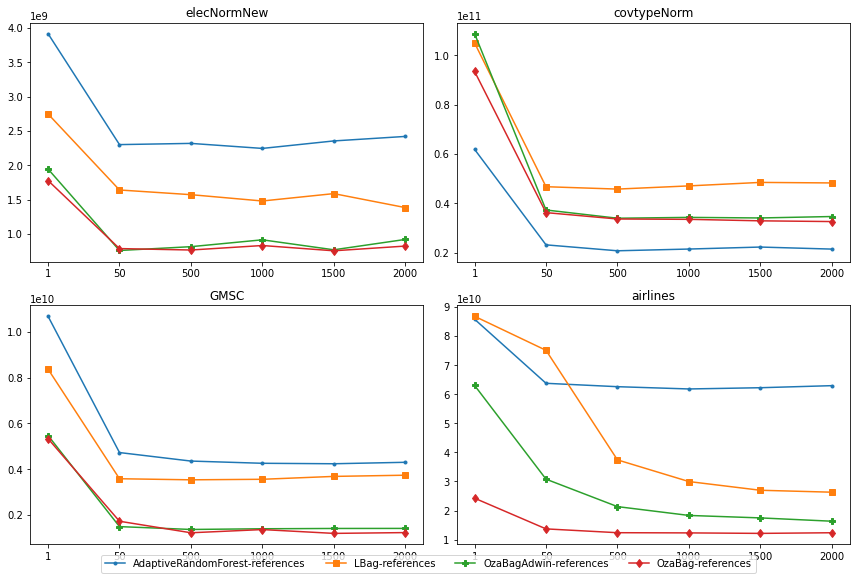

In [11]:
linear_graph()

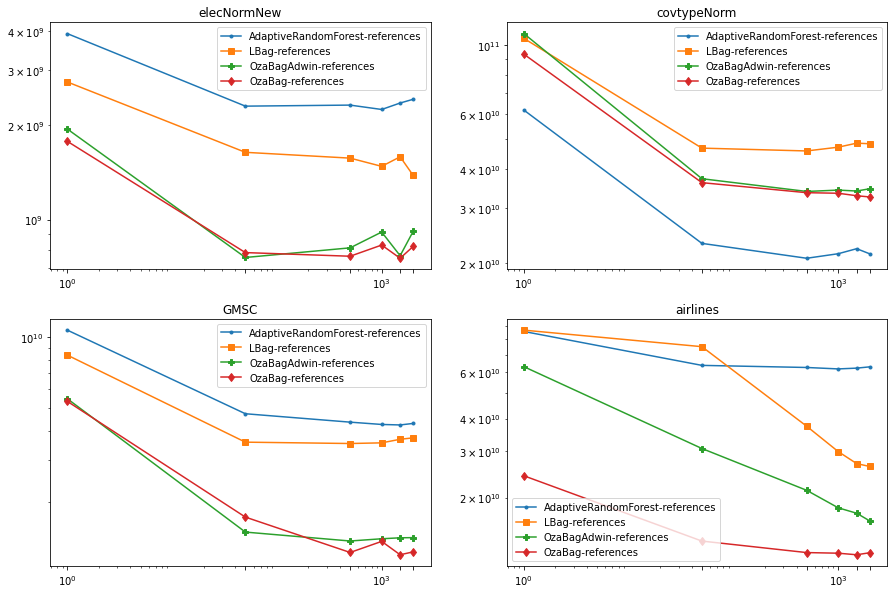

In [12]:
log_graph()

## Data from the time command, checking memory footprint

### Method for parsing each _time_ file

In [25]:
def parse_time(fname):
    global header_printed
    d = {}
    with open(fname) as file:
        for line in file:
            if 'Maximum resident set size (kbytes)' in line:
                spline = [s.strip() for s in line.split(':') if s]
                d[spline[0]] = int(spline[1])
            elif 'maxresident' in line:
                spline = line.split(' ')[5].split('m')
                d['maxresident'] = int(spline[0])
    spf = fname.split('-')
    out = ''
    for i in range(1,len(spf)-1):
        out += f"{spf[i]},"
    # print(out)
    for k,v in d.items():
        out += f"{v}"
    if not header_printed:
        head = "data,alg,esize,cores,csize,max_resident(kb)"
        out = f"{head}\n{out}"
        header_printed = True
    return out

### Actual parse by looping whole directory

In [27]:
directory = os.fsencode("perfExp/")
header_printed = False

with open("perfExp/perfTime.csv", "w+") as output:
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.startswith("time-"): 
            output.write(f"{parse_time(f'perfExp/{filename}')}\n")

## Load csv built in previous and set rows to float

In [30]:
pd.options.display.float_format = '{:,.2f}'.format
df = load_df('perfExp/perfTime.csv')
# df.iloc[:,5:] = df.iloc[:,5:].astype('float64')
print(df.alg.unique())

['LBagExecutorMAXChunk' 'StreamingRandomPatchesExecutorRUNPER'
 'AdaptiveRandomForestExecutorMAXChunk' 'OzaBagASHTExecutorMAXChunk'
 'AdaptiveRandomForestExecutorRUNPER' 'OzaBagAdwinExecutorMAXChunk'
 'OzaBagExecutorMAXChunk' 'OzaBagASHTExecutorRUNPER'
 'StreamingRandomPatchesExecutorMAXChunk' 'LBagExecutorRUNPER']


In [34]:
def filter_by_substring_algorithm(df, string):
    return df[df['alg'].str.contains(string, regex=False)]

In [60]:
algs = ['LBag', 'Ada', 'Stre', 'OzaBagAd', 'OzaBagAS', 'OzaBagEx']
alg_name = {'LBag': 'LBag', 'Ada': 'ARF', 'Stre': 'SRP', 'OzaBagAd': 'OBAd', 'OzaBagAS': 'OBASHT', 'OzaBagEx': 'OB'}
print(f"Dataset       Algorithm    avg_max_resident GB")
for ds in df.data.unique():
    datadf = df[df.data == ds]
    for a in algs:
        adf = filter_by_substring_algorithm(datadf, a)
        avgMR = adf.mean(axis=0)[-1]/1024/1024
        print(f"{ds:13} {alg_name[a]:12} {avgMR:8.2f}")
#         display(adf)

Dataset       Algorithm    avg_max_resident GB
airlines      LBag            20.93
airlines      ARF             20.11
airlines      SRP             19.31
airlines      OBAd            19.24
airlines      OBASHT          14.67
airlines      OB              18.42
elecNormNew   LBag             7.75
elecNormNew   ARF              9.86
elecNormNew   SRP             14.78
elecNormNew   OBAd             1.47
elecNormNew   OBASHT           1.03
elecNormNew   OB               1.15
GMSC          LBag             9.15
GMSC          ARF             13.15
GMSC          SRP             13.80
GMSC          OBAd             3.05
GMSC          OBASHT           1.90
GMSC          OB               2.99
covtypeNorm   LBag            16.84
covtypeNorm   ARF             16.15
covtypeNorm   SRP             17.69
covtypeNorm   OBAd             2.94
covtypeNorm   OBASHT           2.45
covtypeNorm   OB               3.13
